# D400 - Problem Set 3
Answers from Group A2

In [ ]:
# Function set up provided by problem set

import numpy as np
import matplotlib.pyplot as plt

def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

# Example usage
# Define parameters
a = 0.1
b = -0.13
c = 9

# Define time range
t = np.linspace(0, 1, 100)  # time from 0 to 1 with 100 points

# Calculate f(t) for these parameters
f_values = f(t, a, b, c)

ModuleNotFoundError: No module named 'numpy'

## Question 1
Answered by - Yasmin Fox

In [ ]:
from scipy.interpolate import interp1d

# Set input variable x to t, set output function y to f_values, both defined above
x = t
y = f_values

# Interpolator function with respect to t
interp_t = interp1d(x,y, fill_value = "extrapolate")

## Question 2
Answered by - Yasmin Fox

In [ ]:
# redefine t to finer grid
t2 = np.linspace(0,1,1001)
x2 = t2
f_t2 = interp_t(t2)

## Question 3
Answered by - Yasmin Fox

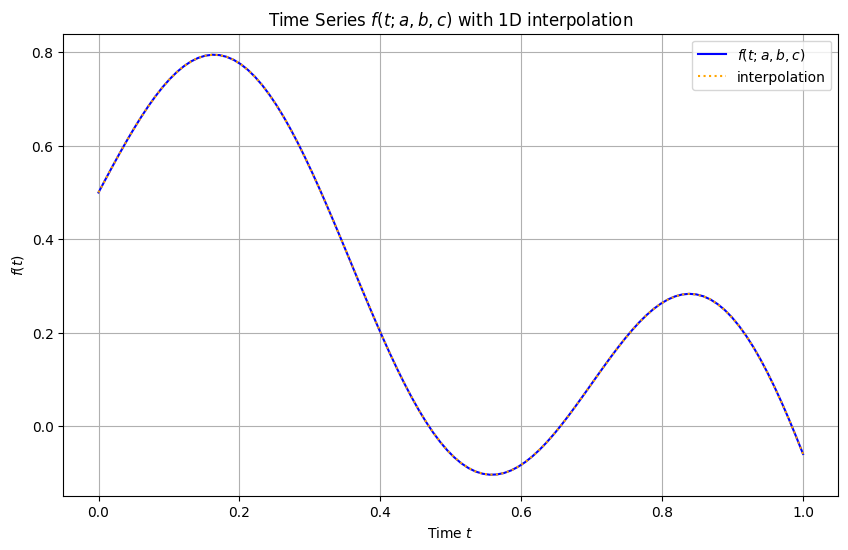

In [ ]:
# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
plt.plot(t2, f_t2, label=r'interpolation', color = 'orange', ls = ':')
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title(r'Time Series $f(t; a, b, c)$ with 1D interpolation')
plt.legend()
plt.grid(True)
plt.show()

## Question 4
Answered by - Cai Parry-Jones

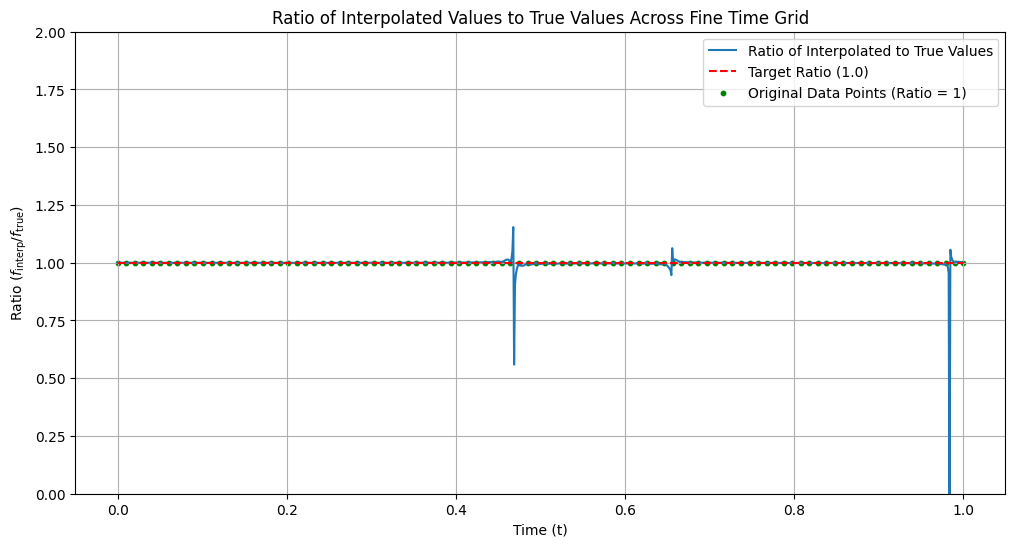

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

a = 0.1
b = -0.13
c = 9

t = np.linspace(0, 1, 100)
f_values = f(t, a, b, c)
interp_t = interp1d(t, f_values, fill_value="extrapolate")
t2 = np.linspace(0, 1, 1001)
f_true_t2 = f(t2, a, b, c)
f_t2 = interp_t(t2)

epsilon = 1e-10 
ratio = f_t2 / (f_true_t2 + epsilon)

plt.figure(figsize=(12, 6))
plt.plot(t2, ratio, label='Ratio of Interpolated to True Values')
plt.hlines(1.0, t2.min(), t2.max(), color='r', linestyle='--', label='Target Ratio (1.0)')
plt.scatter(t, np.ones_like(t), color='g', marker='o', s=10, label='Original Data Points (Ratio = 1)')
plt.title('Ratio of Interpolated Values to True Values Across Fine Time Grid')
plt.xlabel('Time (t)')
plt.ylabel('Ratio ($f_{\\text{interp}} / f_{\\text{true}}$)')
plt.ylim(0, 2)
plt.legend()
plt.grid(True)
plt.show()

## Question 5
Answered by - Cai Parry-Jones

DataFrame Head:
            a=0.00    a=0.11    a=0.22    a=0.33    a=0.44    a=0.56  \
0.000000  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
0.010101  0.499898  0.530199  0.542750  0.552381  0.560500  0.567653   
0.020202  0.499592  0.560023  0.585055  0.604262  0.620454  0.634720   
0.030303  0.499082  0.589223  0.626560  0.655210  0.679363  0.700643   
0.040404  0.498368  0.617551  0.666918  0.704799  0.736734  0.764869   

            a=0.67    a=0.78    a=0.89    a=1.00  
0.000000  0.500000  0.500000  0.500000  0.500000  
0.010101  0.574120  0.580067  0.585602  0.590801  
0.020202  0.647618  0.659478  0.670517  0.680886  
0.030303  0.719881  0.737572  0.754038  0.769504  
0.040404  0.790305  0.813696  0.835468  0.855917  
------------------------------


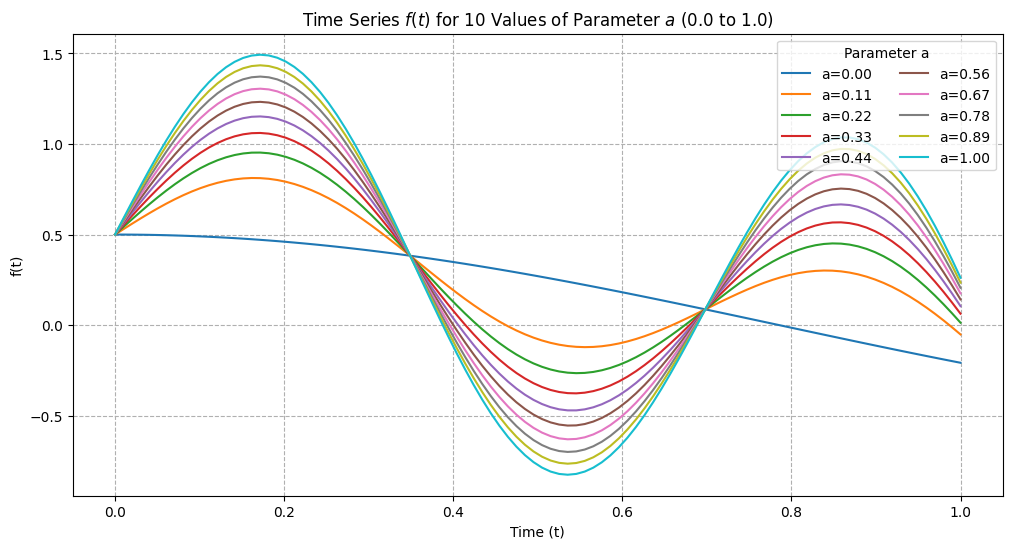

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

b = -0.13
c = 9

t_max = 1
t_points = 100
t = np.linspace(0, t_max, t_points)
a_values = np.linspace(0.0, 1.0, 10)

data = {}
for i, a_val in enumerate(a_values):
    # Calculate f(t) for the current 'a' value
    f_ts = f(t, a_val, b, c)
    
    # Store the series in the dictionary with a descriptive column name
    col_name = f'a={a_val:.2f}'
    data[col_name] = f_ts


df = pd.DataFrame(data, index=t)

print("DataFrame Head:")
print(df.head())
print("-" * 30)

plt.figure(figsize=(12, 6))
df.plot(ax=plt.gca(), title='Time Series $f(t)$ for 10 Values of Parameter $a$ (0.0 to 1.0)')
plt.xlabel('Time (t)')
plt.ylabel('f(t)')
plt.grid(True, linestyle='--')
plt.legend(title='Parameter a', loc='upper right', ncol=2)
plt.show()

## Question 6
Answered by - Alberto Moscardo Plescan

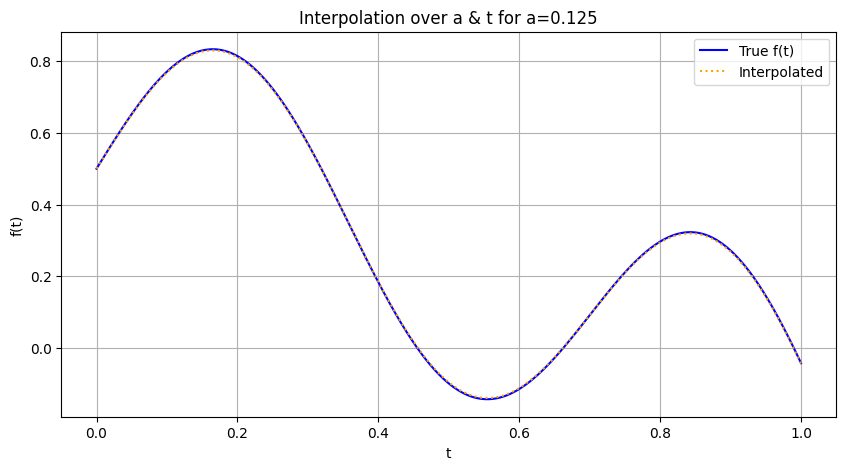

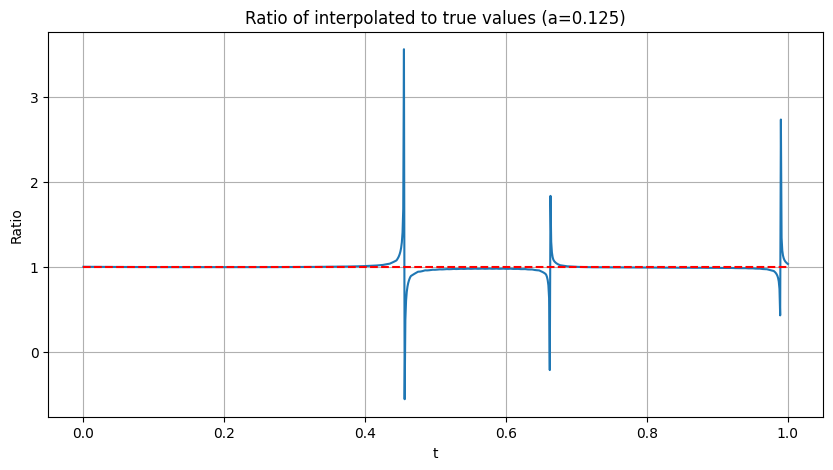

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

# Fixed parameters
b = -0.13
c = 9

# Original time grid and a-grid
t = np.linspace(0, 1, 100)
a_values = np.linspace(0.0, 1.0, 10)

# Compute f for all (a, t)
F = np.zeros((len(a_values), len(t)))
for i, a_val in enumerate(a_values):
    F[i, :] = f(t, a_val, b, c)

# Create 2D interpolator over (a, t)
interp_2d = RegularGridInterpolator(
    (a_values, t), 
    F,
    bounds_error=False,
    fill_value=None
)

# Evaluate at a = 0.125 on a fine t-grid
a_query = 0.125
t_fine = np.linspace(0, 1, 1001)

# Points must be shape (N, 2)
pts = np.column_stack([np.full_like(t_fine, a_query), t_fine])

f_interp = interp_2d(pts)
f_true = f(t_fine, a_query, b, c)

# PLOT #1 (like Q3)
plt.figure(figsize=(10,5))
plt.plot(t_fine, f_true, label="True f(t)", color="blue")
plt.plot(t_fine, f_interp, label="Interpolated", linestyle=":", color="orange")
plt.title("Interpolation over a & t for a=0.125")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.legend()
plt.grid(True)
plt.show()
 
# PLOT #2 (like Q4)
eps = 1e-10
ratio = f_interp / (f_true + eps)

plt.figure(figsize=(10,5))
plt.plot(t_fine, ratio, label="ratio = interp / true")
plt.hlines(1.0, t_fine.min(), t_fine.max(), colors='red', linestyles='--')
plt.title("Ratio of interpolated to true values (a=0.125)")
plt.xlabel("t")
plt.ylabel("Ratio")
plt.grid(True)
plt.show()


## Question 7
Answered by -

## Question 8
Answered by -